## Observations and Insights 

RESULTS DISCUSSION:

-Based on the number of timepoints per drug regimen, Capomulin and Ramicane had the most timepoints. Final tumor volumes for these drugs were smallest, and the standard error of the means were relatively low (approximately 0.32), compared to other drugs. This suggests that these drugs are effective in reducing tumor volume and that the data is representative of population 0effects.  However, this conclusion is limited because the reasons for fewer timepoints with the other drugs(i.e. stopping the drug sooner) are not known.  
- The final tumor volumes of Infubinol and Ceftamin were generally higher than those of Capomulin and Ramicane.
- Average tumor size and increased mouse weight showed a strong positive correlation.  


In [90]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "Resources/data/Mouse_metadata.csv"
study_results_path = "Resources/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

In [91]:
#check length of datasets and unique IDs

mouse_data = len(mouse_metadata_df["Mouse ID"])
mouse_data_IDs = len(mouse_metadata_df["Mouse ID"].unique())
print(mouse_data)
print(mouse_data_IDs)

study_data = len(study_results_df["Mouse ID"])
study_data_IDs = len(study_results_df["Mouse ID"].unique())
print(study_data)
print(study_data_IDs)

249
249
1893
249


In [92]:
# Combine the data into a single dataset
all_data_df = pd.merge(mouse_metadata_df,study_results_df, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
all_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [93]:
# Check the number of mice.
num_mice = len(all_data_df["Mouse ID"].unique())
print(num_mice)

249


In [128]:
# Find any duplicate rows with the same Mouse ID's and Timepoints. 
all_data_dups_df = all_data_df[all_data_df.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]


In [95]:
# Drop any duplicate rows
all_data_red_df = all_data_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
all_data_red_df.to_csv('all_data.csv')

In [96]:
# Recheck the number of mice
print(len(all_data_red_df))

1888


## Summary Statistics

In [97]:
# Generate a summary statistics table of mean, median, variance, # standard deviation, and SEM of the 
#tumor volume for each regimen.

regimen_gb = all_data_red_df.groupby(["Drug Regimen"])

In [98]:
tumor_mean = regimen_gb["Tumor Volume (mm3)"].mean()
tumor_median = regimen_gb["Tumor Volume (mm3)"].median()
tumor_var = regimen_gb["Tumor Volume (mm3)"].var(ddof=0)
tumor_std = regimen_gb["Tumor Volume (mm3)"].std(ddof=0)
tumor_sem = regimen_gb["Tumor Volume (mm3)"].sem(ddof=0)

In [99]:
#create df with new series from groupby: mean, median, variance, # standard deviation, and SEM
tumor_stats_df = pd.DataFrame({"Average Tumor Volume": tumor_mean, "Median Tumor Volume": tumor_median, 
                             "Tumor Volume Variance": tumor_var, "Tumor Volume St. Dev": tumor_std, 
                             "Tumor Volume SEM": tumor_sem})

tumor_stats_df

,Average Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume St. Dev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.839296,4.983904,0.328629
Ceftamin,52.591172,51.776157,39.069446,6.250556,0.468499
Infubinol,52.884795,51.820584,42.886388,6.548770,0.490851
Ketapril,55.235638,53.698743,68.188930,8.257659,0.602252
Naftisol,54.331565,52.509285,65.817708,8.112811,0.594860
Placebo,54.033581,52.288934,60.830138,7.799368,0.579722
Propriva,52.393463,50.909965,42.862273,6.546928,0.524174
Ramicane,40.216745,40.673236,23.383692,4.835669,0.320250
Stelasyn,54.233149,52.431737,59.122106,7.689090,0.571526


## Bar and Pie Charts

In [100]:
# Generate a bar plot showing the total number of datapoints for each drug regimen using pandas.
# There should be a single bar per regimen
drug_list = all_data_red_df["Drug Regimen"].unique()
drug_tally = regimen_gb["Tumor Volume (mm3)"].count()

In [101]:
tumor_regimen_df = pd.DataFrame(drug_tally)

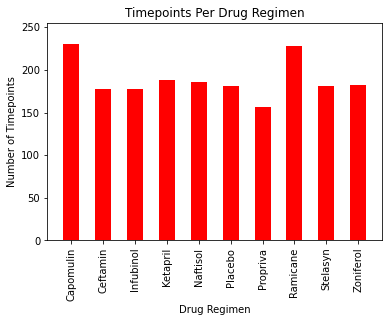

In [102]:
tumor_chart = tumor_regimen_df.plot(kind="bar", figsize = (6, 4), facecolor = "red", 
                                    title = "Timepoints Per Drug Regimen", legend=False)

x_axis = np.arange(len(drug_list))
tumor_chart.set_ylabel("Number of Timepoints")
plt.xlim(-0.75, len(x_axis) -0.25)
plt.ylim(0,max(drug_tally)+25)
fig1 = plt.gcf()
plt.show()
fig1.savefig("Results_Plots/Fig 1 - Timepoints Per Drug Regimen Barplot - Pandas", dpi=100)

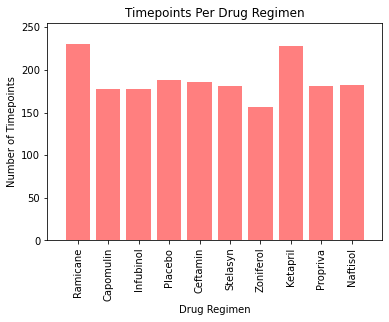

In [103]:
# Generate identical bar plot using pyplot instead of pandas.
x_axis = np.arange(len(drug_list))
plt.bar(x_axis, drug_tally, color='r', alpha = 0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, (drug_list), rotation="vertical")
plt.xlim(-1, len(x_axis)+0)
plt.ylim(0,max(drug_tally)+25)
plt.title("Timepoints Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")

fig2 = plt.gcf()
plt.show()
fig2.savefig("Results_Plots/Fig 2 - Timepoints Per Drug Regimen Barplot - Pyplot", dpi=100)

In [104]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#use df.loc female and count(), then df.loc male then count() - or len list 
female_df = all_data_red_df.loc[(all_data_red_df["Sex"] == "Female")]
female_gb = female_df.groupby(["Mouse ID"])
female = len(female_gb["Mouse ID"].unique())

male_df = all_data_red_df.loc[(all_data_red_df["Sex"] == "Male")]
male_gb = male_df.groupby(["Mouse ID"])
male = len(male_gb["Mouse ID"].unique())

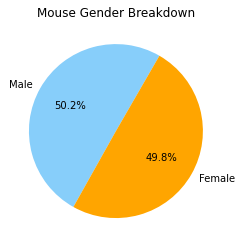

In [105]:
gender = [male, female]
gender_s = pd.Series(gender, index = range(len(gender)), name="")
labels = ["Male", "Female"]
colors = ["lightskyblue", "orange"]
gender_s.plot(kind="pie",labels=labels, autopct='%1.1f%%', colors=colors, startangle =60, 
              legend=False)
plt.title("Mouse Gender Breakdown")

fig3 = plt.gcf()
plt.show()
fig3.savefig("Results_Plots/Fig 3 - Gender Breakdown Pie Chart - Pandas", dpi=100)

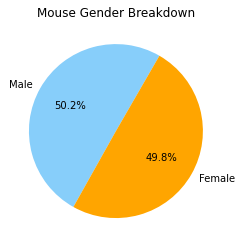

In [106]:
# Generate identical pie plot using pyplot

labels = ["Male", "Female"]
sizes = [male, female]
colors = ["lightskyblue", "orange"]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle =60)
plt.title("Mouse Gender Breakdown")

fig4 = plt.gcf()
plt.show()
fig4.savefig("Results_Plots/Fig 4 - Gender Breakdown Pie Chart - Pyplot", dpi=100)

## Quartiles, Outliers and Boxplots

In [107]:
# Calculate the final tumor volume of each mouse across the following four treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#find last tumor volume for each mouse
mouse_gb = all_data_red_df.groupby(["Mouse ID"])
final_vol_df = pd.concat([mouse_gb.tail(1)]).drop_duplicates()

#reset index to use in loc
final_vol_df = final_vol_df.set_index("Drug Regimen")

#use loc to find final tumor volume  
vol_select = final_vol_df.loc[["Capomulin", "Ramicane", "Infubinol", "Ceftamin"], 
                              ["Mouse ID", "Tumor Volume (mm3)"]]
vol_select_df = pd.DataFrame(vol_select) 

#rename column:
vol_select_df = vol_select_df.rename(columns={"Tumor Volume (mm3)": "Final Tumor Volume (mm3)"})

#reset index:
vol_select_df.reset_index(inplace=True)

vol_select_df

,Drug Regimen,Mouse ID,Final Tumor Volume (mm3)
0,Capomulin,s185,23.343598
1,Capomulin,x401,28.484033
2,Capomulin,m601,28.430964
3,Capomulin,f966,30.485985
4,Capomulin,u364,31.023923
...,...,...,...
95,Ceftamin,x226,45.000000
96,Ceftamin,x581,64.634949
97,Ceftamin,x822,61.386660
98,Ceftamin,y769,68.594745


Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [108]:
# Calculate quartiles, IQR, and identify potential outliers for each regimen.

# Put treatments into a list for for loop (and later for plot labels)
drug = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug: 
    vol = vol_select_df.loc[vol_select_df["Drug Regimen"] == drug]["Final Tumor Volume (mm3)"]
    vol_list.append(vol)
    quartiles = vol.quantile([0.25,0.5,0.75])
    lowerq = round(quartiles[0.25],2)
    upperq = round(quartiles[0.75],2)
    iqr = round(upperq-lowerq ,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)        
    min_vol = round(vol.min(), 2)
    max_vol = round(vol.max(), 2)
     
    print(f"{drug}")
    print(f"-------------------------------------------------")
    print(f"Lower Quartile: {lowerq}")
    print(f"Upper Quartile: {upperq}")
    print(f"Interquartile Range: {iqr}")    
    print(f"Lower Boundary: {lower_bound}")
    print(f"Upper Boundary: {upper_bound}")
    print(f"Min Final Tumor Vol: {min_vol}")
    print(f"Max Final Tumor Vol: {max_vol}")
    if (min_vol >= lower_bound) & (max_vol <= upper_bound):
        print("The dataset did not contain any outliers.")
    else:
        if min_vol < lower_bound:
            print("Lower-bound outlier(s) exist.")
        else:
            print("There are no lower-bound outliers.")
        if max_vol > upper_bound:
            print("Upper-bound outlier(s) exist.")
        else:
            print("There are no upper-bound outliers.")
    print(f"-------------------------------------------------")


Capomulin
-------------------------------------------------
Lower Quartile: 32.38
Upper Quartile: 40.16
Interquartile Range: 7.78
Lower Boundary: 20.71
Upper Boundary: 51.83
Min Final Tumor Vol: 23.34
Max Final Tumor Vol: 47.69
The dataset did not contain any outliers.
-------------------------------------------------
Ramicane
-------------------------------------------------
Lower Quartile: 31.56
Upper Quartile: 40.66
Interquartile Range: 9.1
Lower Boundary: 17.91
Upper Boundary: 54.31
Min Final Tumor Vol: 22.05
Max Final Tumor Vol: 45.22
The dataset did not contain any outliers.
-------------------------------------------------
Infubinol
-------------------------------------------------
Lower Quartile: 54.05
Upper Quartile: 65.53
Interquartile Range: 11.48
Lower Boundary: 36.83
Upper Boundary: 82.75
Min Final Tumor Vol: 36.32
Max Final Tumor Vol: 72.23
Lower-bound outlier(s) exist.
There are no upper-bound outliers.
-------------------------------------------------
Ceftamin
---------

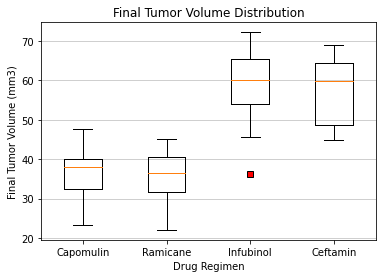

In [143]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# There should be a single chart with four box plots inside it.

# Multiple box plots in one 
L1 = vol_select_df.loc[vol_select_df["Drug Regimen"] == "Capomulin"]["Final Tumor Volume (mm3)"]
L2 = vol_select_df.loc[vol_select_df["Drug Regimen"] == "Ramicane"]["Final Tumor Volume (mm3)"]
L3 = vol_select_df.loc[vol_select_df["Drug Regimen"] == "Infubinol"]["Final Tumor Volume (mm3)"]
L4 = vol_select_df.loc[vol_select_df["Drug Regimen"] == "Ceftamin"]["Final Tumor Volume (mm3)"]

x = []
labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
plt.boxplot([L1, L2, L3, L4])
plt.xticks(x, labels)
plt.title("Final Tumor Volume Distribution")
plt.ylabel("Final Tumor Volume (mm3)")
plt.xlabel("Drug Regimen")
plt.grid(color='grey', axis='y', linestyle='-', linewidth=0.5, alpha=0.75)

red_square = dict(markerfacecolor='r', marker='s')
plt.boxplot([L1, L2, L3, L4],flierprops=red_square)

fig5 = plt.gcf()
plt.show()
fig5.savefig("Results_Plots/Fig 5 - Final Tumor Volume Distribution - Boxplot", dpi=100)

## Line and Scatter Plots

### Line Plot

In [110]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

x401_stats_df = all_data_red_df.loc[all_data_red_df["Mouse ID"] == "x401", :] 

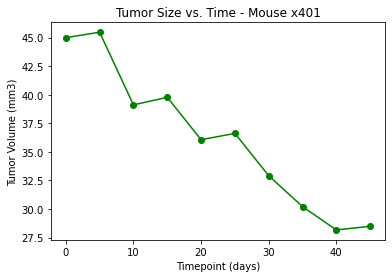

In [127]:
x_axis = x401_stats_df["Timepoint"]
y_axis = x401_stats_df["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis, marker='o', color='green')
plt.title("Tumor Size vs. Time - Mouse x401")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

fig6 = plt.gcf()
plt.show()
fig6.savefig("Results_Plots/Fig 6 - Tumor Size vs Time - Line Chart", dpi=100)

### Scatter Plot, Correlation and Linear Regression

In [112]:
# Generate a scatter plot of average tumor volume vs. mouse weight for all mice in the Capomulin regimen
capomulin_stats_df = all_data_red_df.loc[all_data_red_df["Drug Regimen"] == "Capomulin", :] 
mouse_stats_Cap_gb = capomulin_stats_df.groupby(["Weight (g)"]) 
avg_vol_Cap2 = mouse_stats_Cap_gb['Tumor Volume (mm3)'].mean()

avg_vol_df = pd.DataFrame(avg_vol_Cap2)
avg_vol_df = avg_vol_df.rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume (mm3)"})
avg_vol_df.reset_index(inplace=True)

y = 0.89x + 22.76
The correlation between the Average Tumor Size and Mouse Weight is 0.95


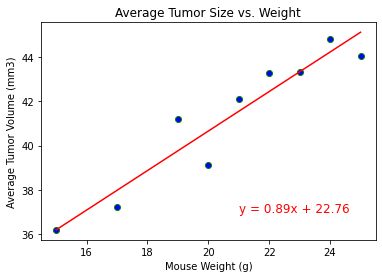

In [113]:
x_axis = avg_vol_df["Weight (g)"]
y_axis = avg_vol_df["Average Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#scatter plot and equation 
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="green")
plt.title("Average Tumor Size vs. Weight")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

#add line
plt.annotate(line_eq, (21,37), fontsize = 12, color="red")

plt.plot(x_axis, regress_values, "r-")
print(line_eq)

# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor 
#volume #for the Capomulin regimen
pearsonr = st.pearsonr(x_axis, y_axis)

print(f"The correlation between the Average Tumor Size and Mouse Weight is {round(pearsonr[0],2)}")

fig7 = plt.gcf()
plt.show()
fig7.savefig("Results_Plots/Fig 7 - Average Tumor Size vs Weight - Scatter Plot, Linear Reg", dpi=100)

# Observations and Insights